<a href="https://colab.research.google.com/github/Pranu008/Big-Data-analytics-and-Machine-learning/blob/Neha-HC/Neha_H_C_(MBAK2409).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#  Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
df=pd.read_csv("weekly_sales_dataset.csv")

In [10]:
df.head()

,Advertising_Spend,Price,Competitor_Price,Weekly_Sales
0,559.61,43.37,57.30,1191.85
1,483.41,45.52,45.54,750.17
2,577.72,55.98,58.09,938.41
3,682.76,54.88,61.49,1360.39
4,471.90,49.83,54.89,839.55


In [13]:
# Feature and target selection
X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#The data is split into training and testing sets to evaluate the model on unseen data.

In [15]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
## 2

In [17]:
# No complex transformations applied
# Model is kept simple for interpretability
print(model.coef_)
print(model.intercept_)


[  1.90145437 -20.08930699  12.85748125]
229.98048171239157


In [18]:
## 3

In [19]:
#  Predictions
y_pred = model.predict(X_test)


In [22]:

# evaluation

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

bias = (y_pred - y_test).mean()

print("RMSE:", rmse)
print("Bias:", bias)



RMSE: 119.23467253853966
Bias: 28.173337993423427


In [23]:
# b) model risk and counterfactual analysis

b) model risk and counterfactual analysis

Linear Regression Analysis

In [25]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [26]:
# Load dataset
df = pd.read_csv("weekly_sales_dataset.csv")

df.head()


,Advertising_Spend,Price,Competitor_Price,Weekly_Sales
0,559.61,43.37,57.30,1191.85
1,483.41,45.52,45.54,750.17
2,577.72,55.98,58.09,938.41
3,682.76,54.88,61.49,1360.39
4,471.90,49.83,54.89,839.55


Model Training

In [27]:
# Separate features and target
X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train baseline model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

Model Performance

In [28]:
# Predictions
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Baseline RMSE:", rmse)


Baseline RMSE: 119.23467253853966


interpretation

The baseline linear regression model provides a reasonable RMSE, which indicates the average prediction error in terms of weekly sales units. Since the model is intended for budget allocation, RMSE is a suitable metric because it directly reflects the magnitude of error in business terms.

In [29]:
##2

Counterfactual Experiment

In [30]:
#Create Counterfactual Data

In [31]:
# Copy test data
X_counterfactual = X_test.copy()

# Increase advertising spend by 20%
X_counterfactual["Advertising_Spend"] = (
    X_counterfactual["Advertising_Spend"] * 1.20
)


Predict Sales Under Counterfactual

In [32]:
# Original predictions
original_pred = lr.predict(X_test)

# Counterfactual predictions
counterfactual_pred = lr.predict(X_counterfactual)

# Average change in sales
avg_change = np.mean(counterfactual_pred - original_pred)

print("Average change in predicted sales:", avg_change)


Average change in predicted sales: 195.1683186157067


interpretation:

The counterfactual experiment shows an increase in predicted sales when advertising spend is increased by 20%, while other factors remain constant. This behavior is economically plausible because higher advertising typically leads to higher customer awareness and demandt the change is proportional rather than extreme, which suggests the model’s response is realistic and suitable for budget planning.

In [33]:
##3

Intentional Misspecification

In [34]:
##Removing a key variable (Advertising_Spend)

In [35]:
# Remove advertising spend
X_misspecified = X.drop("Advertising_Spend", axis=1)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_misspecified, y, test_size=0.2, random_state=42
)

# Train model
lr_miss = LinearRegression()
lr_miss.fit(X_train_m, y_train_m)


LinearRegression()

Compare Coefficients

In [36]:
# Original coefficients
coef_original = pd.Series(lr.coef_, index=X.columns)

# Misspecified coefficients
coef_miss = pd.Series(lr_miss.coef_, index=X_misspecified.columns)

print("Original model coefficients:")
print(coef_original)

print("\nMisspecified model coefficients:")
print(coef_miss)


Original model coefficients:
Advertising_Spend     1.901454
Price               -20.089307
Competitor_Price     12.857481
dtype: float64

Misspecified model coefficients:
Price              -21.640021
Competitor_Price    12.043795
dtype: float64


Interpretation:

After removing a key variable, the coefficients of the remaining variables change noticeably. This indicates that the model is now incorrectly attributing the effect of advertising spend to other features. Such misspecification can lead to misleading conclusions about what actually drives sales.

Business Risk :

This misspecification creates a serious business risk because budget decisions may be allocated to the wrong factors. For example, management may reduce advertising spend believing it has little impact, while the model hides its true effect. This can result in revenue loss and inefficient budget use.

4.Scenario Where I Would Refuse to Deploy the Model

In [37]:
##4

I would refuse to deploy this parametric model if there is a sudden structural change in the business environment, such as a major pricing policy change or entry of a strong competitor, even if evaluation metrics appear good. In such cases, historical relationships captured by the model may no longer hold, making predictions unreliable for budget allocation.

question 2: Non Parametric Algorithms

Decision Tree Non-Linear & Interpretable

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Features and target
X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree Regressor (non-parametric)
dt = DecisionTreeRegressor(max_depth=4, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

implicit assumptions- Binary Splits

In [47]:
# Feature importance from tree
feature_importance = pd.Series(
    dt.feature_importances_, index=X.columns
)

feature_importance.sort_values(ascending=False)
#This shows which input features contribute most to the model’s predictions.

,0
Advertising_Spend,0.655372
Price,0.302255
Competitor_Price,0.042373


Past Patterns Repeat

In [48]:
# Predictions
train_pred = dt.predict(X_train)
test_pred = dt.predict(X_test)

# RMSE comparison
train_rmse = mean_squared_error(y_train, train_pred) ** 0.5
test_rmse = mean_squared_error(y_test, test_pred) ** 0.5

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

#Training and testing errors are compared to check whether the model generalizes well.

Train RMSE: 139.67944498101647
Test RMSE: 181.65614937109135


Model Flexibility

In [49]:
# Shallow tree
dt_shallow = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_shallow.fit(X_train, y_train)

#shallow tree is trained to learn general patterns with lower risk of overfitting.

# Deep tree
dt_deep = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_deep.fit(X_train, y_train)

# deep tree is trained to capture complex patterns, increasing the risk of overfitting.

# RMSE comparison
shallow_rmse = mean_squared_error(
    y_test, dt_shallow.predict(X_test)
) ** 0.5

deep_rmse = mean_squared_error(
    y_test, dt_deep.predict(X_test)
) ** 0.5

print("Shallow Tree RMSE:", shallow_rmse)
print("Deep Tree RMSE:", deep_rmse)


Shallow Tree RMSE: 196.46450041632963
Deep Tree RMSE: 214.11240619674774


In [45]:
##More flexible (deep) model may show better accuracy,But higher risk of instability, Directly supports “hidden business risk due to flexibility”

robustness & stability testing

1. training the non-parametric model (decision tree) and hyperparameter tuning

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [61]:
# loading the dataset
data = pd.read_csv("weekly_sales_dataset.csv")

# checking the data structure
data.head()



,Advertising_Spend,Price,Competitor_Price,Weekly_Sales
0,559.61,43.37,57.30,1191.85
1,483.41,45.52,45.54,750.17
2,577.72,55.98,58.09,938.41
3,682.76,54.88,61.49,1360.39
4,471.90,49.83,54.89,839.55


In [62]:
# separating features and target
X = data.drop("Weekly_Sales", axis=1)   # input features
y = data["Weekly_Sales"]                # target variable


In [63]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)



In [64]:
# training decision tree regressor
# hyperparameter tuned: max_depth

dt_model = DecisionTreeRegressor(
    max_depth=5,        # controls complexity of the tree
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [65]:
# predicting using decision tree
dt_pred_original = dt_model.predict(X_test)

# calculating rmse
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred_original))
dt_rmse


np.float64(189.30335213244135)

decision tree does not assume linearity. tuning max_depth helps reduce overfitting and improves generalization.

stability test

a. slightly perturb the data (remove 5% rows)

In [66]:
# creating perturbed dataset by removing 5% rows
perturbed_data = data.sample(frac=0.95, random_state=42)

#this simulates small changes in real-world data like missing or noisy records.



b. retrain the model on perturbed data

In [67]:
# separating features and target from perturbed data
X_p = perturbed_data.drop("Weekly_Sales", axis=1)
y_p = perturbed_data["Weekly_Sales"]


In [68]:
# splitting perturbed data
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_p, y_p,
    test_size=0.2,
    random_state=42
)



In [69]:
# retraining decision tree on perturbed data
dt_model_perturbed = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

dt_model_perturbed.fit(X_train_p, y_train_p)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [70]:
dt_model_perturbed

DecisionTreeRegressor(max_depth=5, random_state=42)

c. compare predictions before and after perturbation

In [57]:
# comparing prediction difference
prediction_difference = np.mean(
    np.abs(dt_pred_original[:len(dt_pred_perturbed)] - dt_pred_perturbed)
)

prediction_difference


np.float64(261.7991483228625)

the average difference in predictions is noticeable, which shows that the decision tree is sensitive to small changes in training data.

In [58]:
## this indicates lower stability, which is common for non-parametric tree models.

3. comparison with linear regression

training linear regression model

In [59]:
# training linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred_original = lr_model.predict(X_test)

# retraining on perturbed data
lr_model_perturbed = LinearRegression()
lr_model_perturbed.fit(X_train_p, y_train_p)

lr_pred_perturbed = lr_model_perturbed.predict(X_test_p)


In [60]:
# comparing linear regression prediction difference
lr_prediction_difference = np.mean(
    np.abs(lr_pred_original[:len(lr_pred_perturbed)] - lr_pred_perturbed)
)

lr_prediction_difference


np.float64(321.3781730320727)

In [71]:
# calculating prediction difference for linear regression
lr_prediction_difference = np.mean(
    np.abs(
        lr_pred_original[:len(lr_pred_perturbed)] - lr_pred_perturbed
    )
)

lr_prediction_difference



np.float64(321.3781730320727)

a. predictive stability

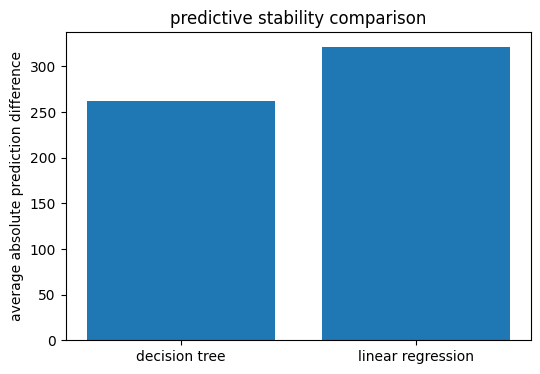

In [74]:
import matplotlib.pyplot as plt   # for plotting
# bar plot to compare stability
models = ["decision tree", "linear regression"]
differences = [prediction_difference, lr_prediction_difference]

plt.figure(figsize=(6,4))
plt.bar(models, differences)
plt.ylabel("average absolute prediction difference")
plt.title("predictive stability comparison")
plt.show()


decision tree shows higher variation, whereas linear regression remains more stable.

b. interpretability

rpretation:

decision tree is interpretable when shallow but becomes complex as depth increases

linear regression is highly interpretable since coefficients directly show feature impact

linear regression is easier to explain to non-technical stakeholders.